In [1]:
import os
import sys
import pdb
import math
import random
import argparse
import numpy as np
import matplotlib
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import pandas as pd
from common_performance_stats import get_prediction_and_driving_performance

In [2]:
%load_ext autoreload
%autoreload 2

Round 2. Official way to plot

In [5]:
# Getting data for same_computation, Need to specify manually the directory
directories_map = {
    'ca': '/home/phong/driving_data/official/gamma_planner/ca_new/',
    'cv': '/home/phong/driving_data/official/gamma_planner/cv_new/',
    'hivt': '/home/phong/driving_data/official/gamma_planner/hivt_new/',
    'lanegcn': '/home/phong/driving_data/official/gamma_planner/lanegcn_new/',
    'lstmdefault': '/home/phong/driving_data/official/gamma_planner/lstmdefault_new/',
    'lstmsocial': '/home/phong/driving_data/official/gamma_planner/lstmsocial_new/',
    'knnsocial': '/home/phong/driving_data/official/gamma_planner/knnsocial_new/',
    'knndefault': '/home/phong/driving_data/official/gamma_planner/knndefault_new/',
}

prediction_performance_map = {}
driving_performance_map = {}
tree_performance_map = {}


# Loop through all directories and get the prediction and driving performance
for key, value in directories_map.items():
    print(f"Processing {key}")
    prediction_performance, driving_performance, tree_performance, recorded_data = get_prediction_and_driving_performance(value, 20)
    prediction_performance_map[key] = prediction_performance
    driving_performance_map[key] = driving_performance
    tree_performance_map[key] = tree_performance
    

Processing ca

Processing /home/phong/driving_data/official/gamma_planner/ca_new/result/gamma_drive_mode/magic/pomdp_search_log-0_0_pid-56_r-6036439.txt
ADE 2.71, FDE 8.76 temp_cont 0.11 var: 53.38 collision rate 0.02, near_miss_rate 0.02 safety 0.69 jerk 4.17, lat-acc 0.01 avg_speed 2.05, track-err 1.83 eff-time 1.30 
Processing /home/phong/driving_data/official/gamma_planner/ca_new/result/gamma_drive_mode/magic/pomdp_search_log-0_0_pid-57_r-9224192.txt
ADE 2.75, FDE 9.34 temp_cont 0.12 var: 65.10 collision rate 0.02, near_miss_rate 0.01 safety 0.59 jerk 3.36, lat-acc 0.03 avg_speed 4.19, track-err 1.87 eff-time 0.58 
Processing /home/phong/driving_data/official/gamma_planner/ca_new/result/gamma_drive_mode/magic/pomdp_search_log-0_0_pid-57_r-8422812.txt
ADE 1.34, FDE 2.41 temp_cont 0.02 var: 3.70 collision rate 0.00, near_miss_rate 0.00 safety 0.29 jerk 1.47, lat-acc 0.00 avg_speed 5.00, track-err 1.46 eff-time 0.61 
Processing /home/phong/driving_data/official/gamma_planner/ca_new/re

In [14]:
import pickle

# Save the dictionary to a file
def save_dict_to_file(dictionary, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(dictionary, f)

# Load the dictionary from a file
def load_dict_from_file(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

# Save the dictionary to a file
save_dict_to_file(prediction_performance_map, 'prediction_performance_map_RVO.pickle')
save_dict_to_file(driving_performance_map, 'driving_performance_map_RVO.pickle')
save_dict_to_file(tree_performance_map, 'tree_performance_map_RVO.pickle')

# Load the dictionary from the file
# prediction_performance_map = load_dict_from_file('prediction_performance_map1.pickle')
# driving_performance_map = load_dict_from_file('driving_performance_map1.pickle')
# tree_performance_map = load_dict_from_file('tree_performance_map1.pickle')

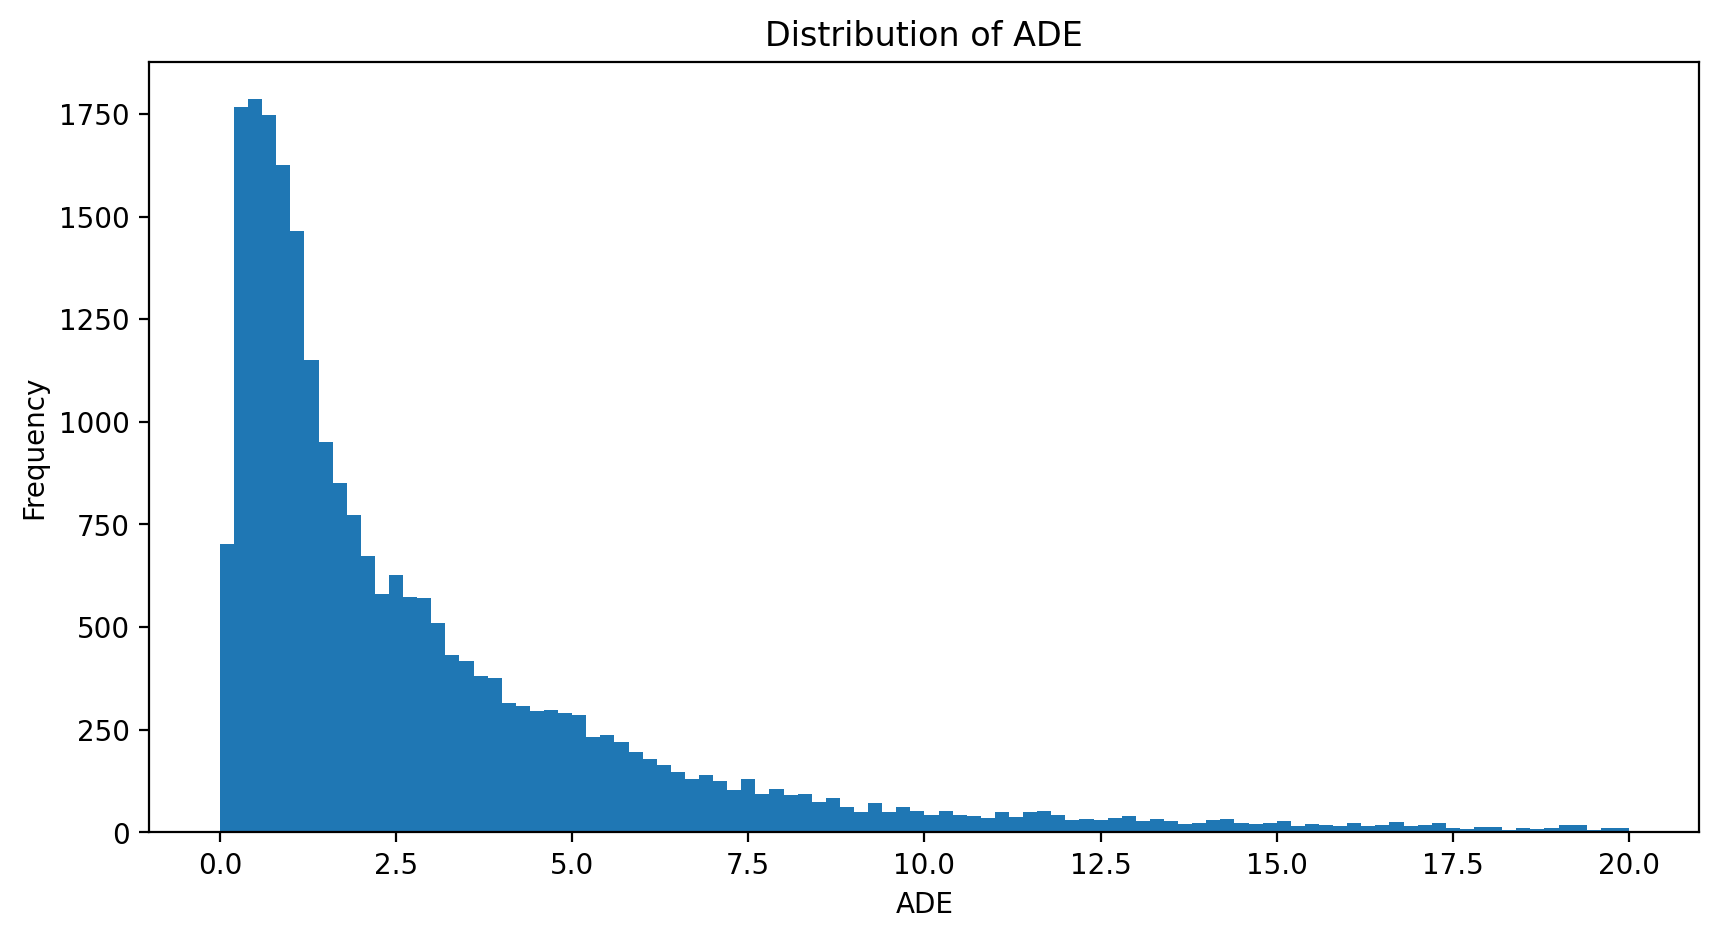

In [112]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Distribution of ADE")

ax.set_xlabel("ADE")

ax.set_ylabel("Frequency")

ax.hist(prediction_performance_map['lstmsocial']['distribution'], bins=100, range=[0,20])

plt.show()


In [15]:
# Figures for fully 20 observation before filtering

#for key in prediction_performance_map.keys():
    # Calculate the sample mean
    #sample_mean = np.nanmean(prediction_performance_map[key]['distribution'])
    # Calculate the sample variance
    #sample_variance = np.nanmean((prediction_performance_map[key]['distribution'] - sample_mean) ** 2)
    #print(f"Mean ADE for {key} is {np.nanmean(prediction_performance_map[key]['distribution']):.2f} - var {sample_variance:.2f}")
    #print(f"Mean ADE for {key} is {np.nanmean(prediction_performance_map[key]['ade']):.2f} and FDE is {np.nanmean(prediction_performance_map[key]['fde']):.2f}")

Mean ADE for ca is 2.65 and FDE is 11.38
Mean ADE for cv is 1.95 and FDE is 7.50
Mean ADE for hivt is 0.74 and FDE is 1.60
Mean ADE for lanegcn is 1.02 and FDE is 2.37
Mean ADE for lstmdefault is 2.46 and FDE is 9.26
Mean ADE for lstmsocial is 1.13 and FDE is 2.70
Mean ADE for knnsocial is 1.94 and FDE is 4.31
Mean ADE for knndefault is 1.51 and FDE is 4.11


In [6]:
# Figures for fully 20 observation before filtering

for key in prediction_performance_map.keys():
    # Calculate the sample mean
    #sample_mean = np.nanmean(prediction_performance_map[key]['distribution'])
    # Calculate the sample variance
    #sample_variance = np.nanmean((prediction_performance_map[key]['distribution'] - sample_mean) ** 2)
    #print(f"Mean ADE for {key} is {np.nanmean(prediction_performance_map[key]['distribution']):.2f} - var {sample_variance:.2f}")
    print(f"Mean ADE for {key} is {np.nanmean(prediction_performance_map[key]['ade']):.2f} and FDE is {np.nanmean(prediction_performance_map[key]['fde']):.2f}")

Mean ADE for ca is 2.89 and FDE is 10.08
Mean ADE for cv is 3.44 and FDE is 10.38
Mean ADE for hivt is 2.31 and FDE is 6.27
Mean ADE for lanegcn is 2.12 and FDE is 7.49
Mean ADE for lstmdefault is 1.77 and FDE is 3.76
Mean ADE for lstmsocial is 1.79 and FDE is 3.61
Mean ADE for knnsocial is 2.32 and FDE is 4.84
Mean ADE for knndefault is 2.37 and FDE is 6.33


In [4]:
def scatter_plot_one_pred_multi_metrics(prediction_performance, driving_performance):  
    # Combine the data into a single DataFrame
    data = {'ADE': prediction_performance['ade']}

    for category, metrics in driving_performance.items():
        for metric, values in metrics.items():
            data[metric] = values

    df = pd.DataFrame(data)

    # Plot the scatter plot matrix
    fig, axes = plt.subplots(3, 4, figsize=(12, 15), sharex=True)

    # Comfort
    axes[0, 0].scatter(df['ADE'], df['jerk'])
    axes[0, 0].set_title('Jerk')

    axes[0, 1].scatter(df['ADE'], df['lateral_acceleration'])
    axes[0, 1].set_title('Lateral Acceleration')

    axes[0, 2].axis('off')
    axes[0, 3].axis('off')

    # Safety
    axes[1, 0].scatter(df['ADE'], df['collision_rate'])
    axes[1, 0].set_title('Collision Rate')

    axes[1, 1].scatter(df['ADE'], df['near_miss_rate'])
    axes[1, 1].set_title('Near Miss Rate')

    axes[1, 2].scatter(df['ADE'], df['mean_min_ttc'])
    axes[1, 2].set_title('Mean Min TTC')

    axes[1, 3].axis('off')


    # Efficiency
    axes[2, 0].scatter(df['ADE'], df['avg_speed'])
    axes[2, 0].set_title('Avg Speed')

    axes[2, 1].scatter(df['ADE'], df['tracking_error'])
    axes[2, 1].set_title('Tracking Error')

    axes[2, 2].scatter(df['ADE'], df['efficiency_time'])
    axes[2, 2].set_title('Efficiency Time')

    axes[2, 3].scatter(df['ADE'], df['distance_traveled'])
    axes[2, 3].set_title('Distance Travelled')

    # Set the x-axis label for all plots
    for ax in axes.flatten():
        ax.set_xlabel('ADE')

    # Add text annotations for each row
    plt.gcf().text(0.02, 0.82, 'Comfort', fontsize=14, fontweight='bold', va='center', rotation='vertical')
    plt.gcf().text(0.02, 0.52, 'Safety', fontsize=14, fontweight='bold', va='center', rotation='vertical')
    plt.gcf().text(0.02, 0.22, 'Efficiency', fontsize=14, fontweight='bold', va='center', rotation='vertical')


    plt.tight_layout()
    plt.show()

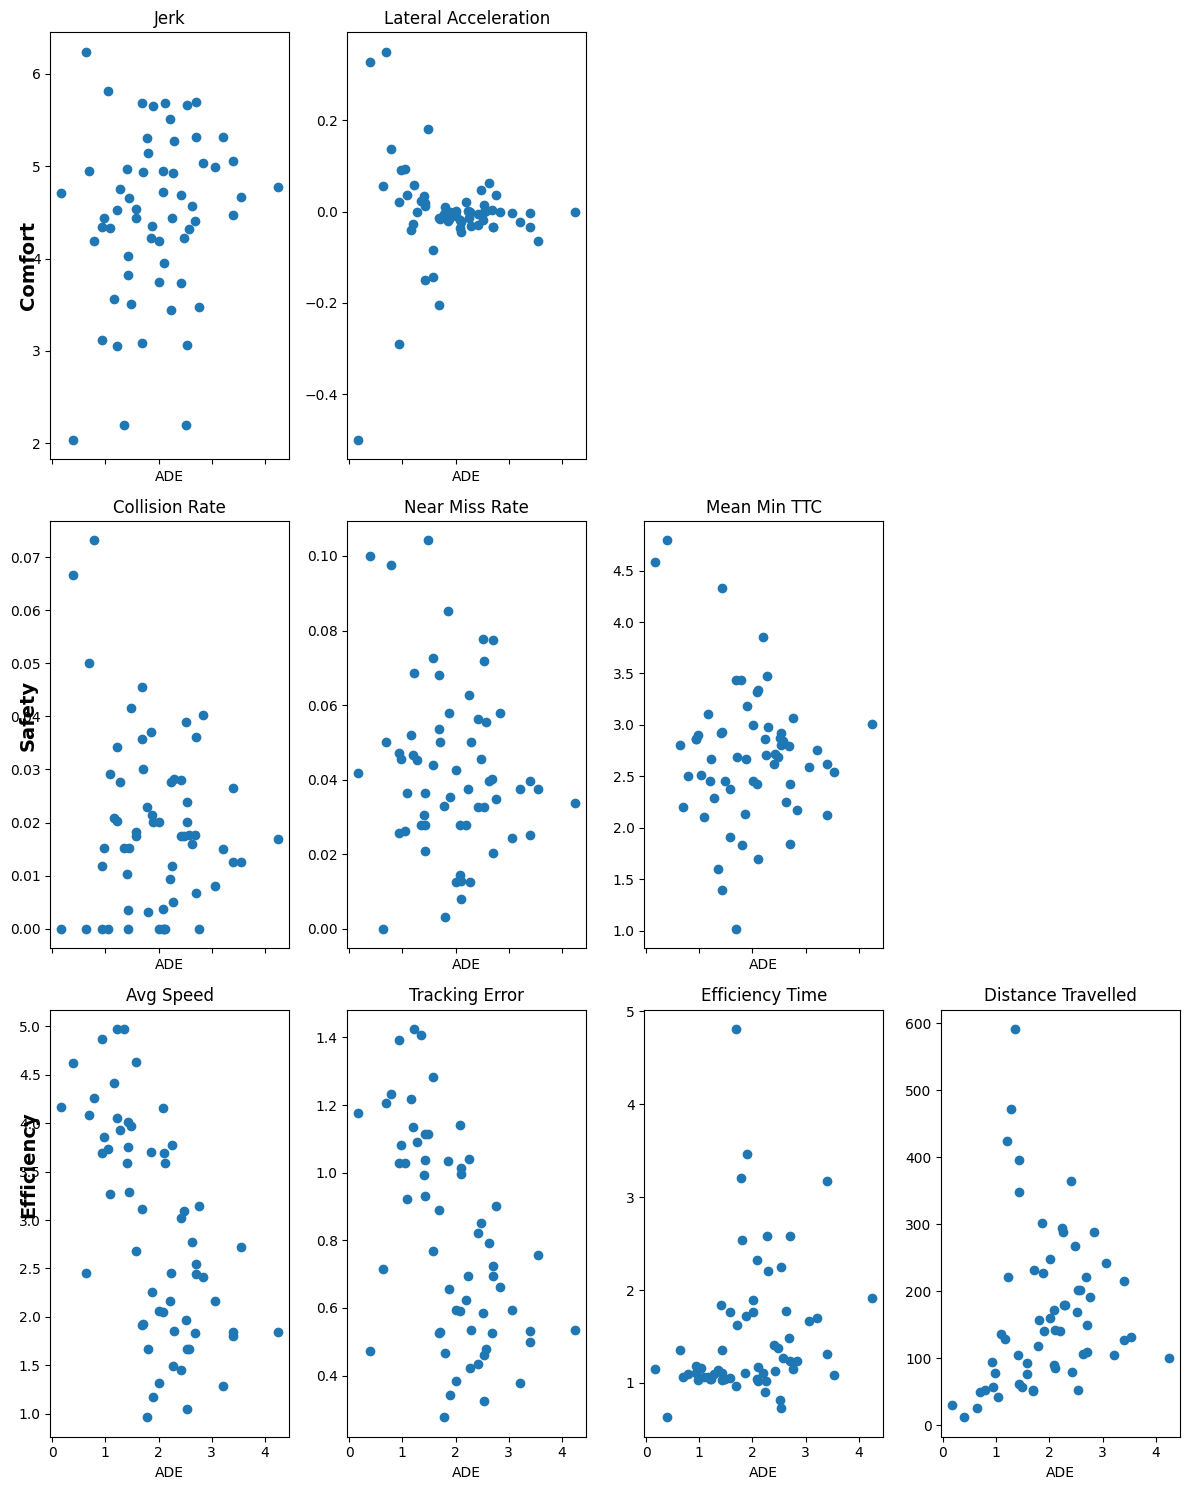

In [5]:
scatter_plot_one_pred_multi_metrics(prediction_performance_map['cv'], driving_performance_map['cv'])

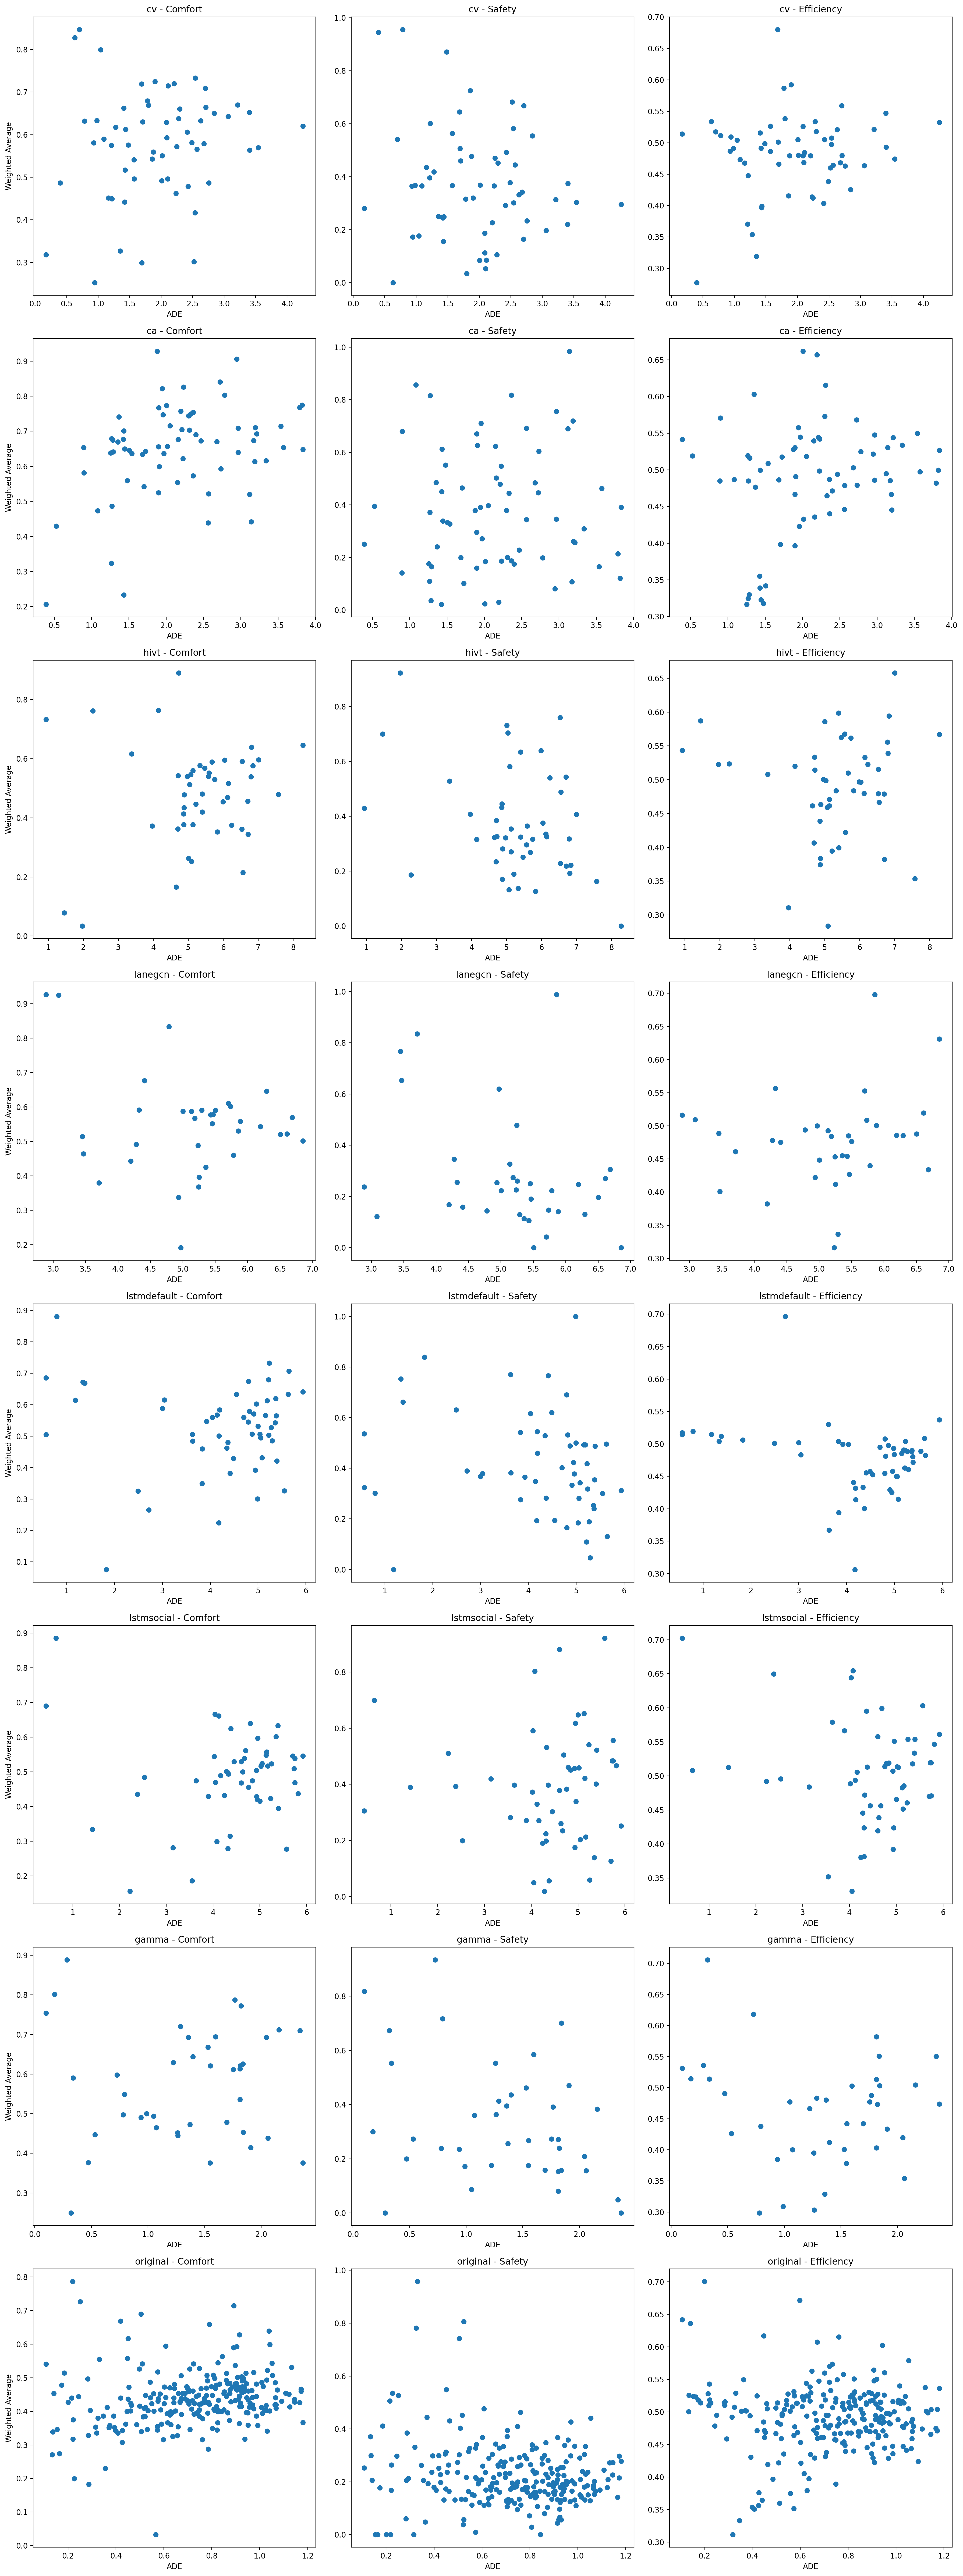

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def scatter_plot_multi_pred_averaged_metrics(prediction_performance, driving_performance, methods_to_plot):  
    # Function to compute the weighted average
    def normalize(arr):
        if np.max(arr) - np.min(arr) == 0:
            return np.zeros_like(arr)
        return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

    def weighted_average(data, weights, directions):
        norm_data = [normalize(arr) if direction == 'lower' else 1 - normalize(arr) for arr, direction in zip(data, directions)]
        return np.sum([w * d for w, d in zip(weights, norm_data)], axis=0)

    def plot_method(method, prediction_performance, driving_performance, row, axes):
        # Weights for each metric within a category
        safety_weights = {
            'collision_rate': 0.99,
            'near_miss_rate': 0.01,
            'mean_min_ttc': 0.0
        }
        safety_directions = {
            'collision_rate': 'lower',
            'near_miss_rate': 'lower',
            'mean_min_ttc': 'higher'
        }
        comfort_weights = {
            'jerk': 0.5,
            'lateral_acceleration': 0.5
            'lateral_acceleration': 0.5
        }
        comfort_directions = {
            'jerk': 'lower',
            'lateral_acceleration': 'lower'
        }
        efficiency_weights = {
            'avg_speed': 0.3,
            'tracking_error': 0.3,
            'efficiency_time': 0.2,
            'distance_traveled': 0.2
        }
        efficiency_directions = {
            'avg_speed': 'higher',
            'tracking_error': 'lower',
            'efficiency_time': 'lower',
            'distance_traveled': 'higher'
        }
        

        # Compute the weighted averages for each category
        safety_data = weighted_average(
            [driving_performance[method]['safety']['collision_rate'],
            driving_performance[method]['safety']['near_miss_rate'],
            driving_performance[method]['safety']['mean_min_ttc']],
            list(safety_weights.values()), list(safety_directions.values()))

        comfort_data = weighted_average(
            [driving_performance[method]['comfort']['jerk'],
            driving_performance[method]['comfort']['lateral_acceleration']],
            list(comfort_weights.values()), list(comfort_directions.values()))

        efficiency_data = weighted_average(
            [driving_performance[method]['efficiency']['avg_speed'],
            driving_performance[method]['efficiency']['tracking_error'],
            driving_performance[method]['efficiency']['efficiency_time'],
            driving_performance[method]['efficiency']['distance_traveled']],
            list(efficiency_weights.values()), list(efficiency_directions.values()))

        # Plot the scatter plots
        axes[row, 0].scatter(prediction_performance[method]['ade'], comfort_data)
        axes[row, 0].set_title(f'{method} - Comfort')
        axes[row, 0].set_xlabel('ADE')
        axes[row, 0].set_ylabel('Weighted Average')
        #axes[row, 0].set_xticks(range(len(prediction_performance[method]['ade'])))
        #axes[row, 0].set_xticklabels([f'{val:.2f}' for val in prediction_performance[method]['ade']])


        axes[row, 1].scatter(prediction_performance[method]['ade'], safety_data)
        axes[row, 1].set_title(f'{method} - Safety')
        axes[row, 1].set_xlabel('ADE')

        axes[row, 2].scatter(prediction_performance[method]['ade'], efficiency_data)
        axes[row, 2].set_title(f'{method} - Efficiency')
        axes[row, 2].set_xlabel('ADE')

    # List of methods to plot
    #methods_to_plot = ['method1', 'method2']

    fig, axes = plt.subplots(len(methods_to_plot), 3, figsize=(18, 6 * len(methods_to_plot)))

    for i, method in enumerate(methods_to_plot):
        plot_method(method, prediction_performance, driving_performance, i, axes)

    plt.tight_layout()
    plt.show()

scatter_plot_multi_pred_averaged_metrics(prediction_performance_map, driving_performance_map, ['cv', 'ca', 'hivt', 'lanegcn', 'lstmdefault', 'lstmsocial', 'gamma', 'original'])

In [28]:
for method, val in tree_performance_map.items():
    for key, v in val.items():
        vals = [item for sublist in v for item in sublist]
        print(f"Method {method} - {key}: {np.mean(vals):.2f}")
    


Method ca - expanded_nodes: 70.53
Method ca - total_nodes: 170.14
Method ca - trial: 33.55
Method ca - depth: 6.55
Method cv - expanded_nodes: 113.35
Method cv - total_nodes: 274.28
Method cv - trial: 51.35
Method cv - depth: 7.07
Method hivt - expanded_nodes: 50.66
Method hivt - total_nodes: 126.91
Method hivt - trial: 24.29
Method hivt - depth: 4.72
Method lanegcn - expanded_nodes: 145.00
Method lanegcn - total_nodes: 297.49
Method lanegcn - trial: 72.84
Method lanegcn - depth: 6.52
Method lstmdefault - expanded_nodes: 85.39
Method lstmdefault - total_nodes: 205.86
Method lstmdefault - trial: 40.44
Method lstmdefault - depth: 5.23
Method lstmsocial - expanded_nodes: 147.17
Method lstmsocial - total_nodes: 329.78
Method lstmsocial - trial: 69.04
Method lstmsocial - depth: 6.08
Method gamma - expanded_nodes: 45.67
Method gamma - total_nodes: 113.65
Method gamma - trial: 22.58
Method gamma - depth: 5.71


In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import plotly.graph_objects as go
from plotly.subplots import make_subplots

def scatter_plot_multi_pred_3_metric(prediction_performance, driving_performance, methods_to_plot, prediction_metric):  
    # Function to compute the weighted average
    def normalize(arr, max_val = 1.0, min_val = 0.0):
        if max_val - min_val == 0:
            return np.zeros_like(arr)
        
        return (arr - np.array(min_val)) / (np.array(max_val) - np.array(min_val)+1e-6)

    def weighted_average(data, weights, directions, max_min_list):
        norm_data = [normalize(arr, max_min[0], max_min[1]) if direction == 'lower'
                      else 1 - normalize(arr, max_min[0], max_min[1]) for arr, direction, max_min in zip(data, directions, max_min_list)]
        return np.sum([w * d for w, d in zip(weights, norm_data)], axis=0)

    def plot_method(method, prediction_performance, driving_performance, max_min_method, row, axes):
        # Weights for each metric within a category
        safety_weights = {
            'collision_rate': 0.2,
            'near_miss_rate': 0.4,
            'mean_min_ttc': 0.4
        }
        safety_directions = {
            'collision_rate': 'lower',
            'near_miss_rate': 'lower',
            'mean_min_ttc': 'higher'
        }
        comfort_weights = {
            'jerk': 0.0,
            'lateral_acceleration': 0.0,
            'acceleration': 1.0
        }
        comfort_directions = {
            'jerk': 'lower',
            'lateral_acceleration': 'lower',
            'acceleration': 'lower'
        }
        efficiency_weights = {
            'avg_speed': 0.0,
            'tracking_error': 0.0,
            'efficiency_time': 1.0,
            'distance_traveled': 0.0, 
        }
        efficiency_directions = {
            'avg_speed': 'higher',
            'tracking_error': 'lower',
            'efficiency_time': 'lower',
            'distance_traveled': 'higher'
        }

        color = colors[0]

        

        # Compute the weighted averages for each category
        max_min_safety = [tuple(max_min_method['safety'][key].values()) for key in max_min_method['safety'].keys()]
        safety_data = weighted_average(
            [driving_performance[method]['safety']['collision_rate'],
            driving_performance[method]['safety']['near_miss_rate'],
            driving_performance[method]['safety']['mean_min_ttc']],
            list(safety_weights.values()), list(safety_directions.values()),
            max_min_safety)

        max_min_comfort = [tuple(max_min_method['comfort'][key].values()) for key in max_min_method['comfort'].keys()]

        comfort_data = weighted_average(
            [driving_performance[method]['comfort']['jerk'],
            driving_performance[method]['comfort']['lateral_acceleration'],
            driving_performance[method]['comfort']['acceleration']],
            list(comfort_weights.values()), list(comfort_directions.values()), max_min_comfort)

        max_min_efficiency = [tuple(max_min_method['efficiency'][key].values()) for key in max_min_method['efficiency'].keys()]
        efficiency_data = weighted_average(
            [driving_performance[method]['efficiency']['avg_speed'],
            driving_performance[method]['efficiency']['tracking_error'],
            driving_performance[method]['efficiency']['efficiency_time'],
            driving_performance[method]['efficiency']['distance_traveled']],
            list(efficiency_weights.values()), list(efficiency_directions.values()), max_min_efficiency)
        

        combined = 0.3 * comfort_data + 0.3 * safety_data + 0.3 *efficiency_data
    

        print(f"max min safety: {max_min_safety}")
        print(f"max min comfort: {max_min_comfort}")
        print(f"max min efficiency: {max_min_efficiency}")

         # Add scatter plots for each method
        fig.add_trace(go.Scatter(x=prediction_performance[method][prediction_metric], y=combined,
                                mode='markers', name=method, marker=dict(color=color)), row=1, col=1)
        # fig.add_trace(go.Scatter(x=prediction_performance[method][prediction_metric], y=safety_data,
        #                         mode='markers', name=method, marker=dict(color=color), showlegend=False), row=1, col=2)
        # fig.add_trace(go.Scatter(x=prediction_performance[method][prediction_metric], y=efficiency_data,
        #                         mode='markers', name=method, marker=dict(color=color), showlegend=False), row=1, col=3)
        
        # Limit x and y axes
        #fig.update_xaxes(range=[0, 5], row=1, col=1)
        #fig.update_xaxes(range=[0, 5], row=1, col=2)
        #fig.update_xaxes(range=[0, 5], row=1, col=3)
        # fig.update_yaxes(range=[0, 5], row=1, col=1)
        # fig.update_yaxes(range=[0, 0.1], row=1, col=2)
        # fig.update_yaxes(range=[0, 3], row=1, col=3)


    # List of methods to plot
    #methods_to_plot = ['method1', 'method2']

    fig = make_subplots(rows=1, cols=3, subplot_titles=("Combined Metrics", "Safety", "Efficiency"))

    # Define colors for each method
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'black'] # Add more colors if needed

    def find_max_min(driving_performance):
        max_min_method = {}
        for category in driving_performance['cv'].keys():
            max_min_method[category] = {}
            for metric in driving_performance['cv'][category].keys():
                max_min_method[category][metric] = {'max':-np.inf, 'min':np.inf}
        
        for i, method in enumerate(methods_to_plot):
            for category in driving_performance[method].keys():
                for metric in driving_performance[method][category].keys():
                    max_min_method[category][metric]['max'] = max(np.max(driving_performance[method][category][metric]), 
                                                                  max_min_method[category][metric]['max'])
                    max_min_method[category][metric]['min'] = min(np.min(driving_performance[method][category][metric]),
                                                                   max_min_method[category][metric]['min'])   
        return max_min_method

    max_min_method = find_max_min(driving_performance_map)

    for i, method in enumerate(methods_to_plot):
        plot_method(method, prediction_performance, driving_performance, max_min_method, i, fig)

    # Update axis labels
    fig.update_xaxes(title_text="ADE", row=1, col=1)
    fig.update_yaxes(title_text="Combined Metrics", row=1, col=1)

    # fig.update_xaxes(title_text="ADE", row=1, col=2)
    # fig.update_yaxes(title_text="Weighted Safety", row=1, col=2)

    # fig.update_xaxes(title_text="ADE", row=1, col=3)
    # fig.update_yaxes(title_text="Weighted Efficiency", row=1, col=3)

    # Show the plot
    fig.show()

scatter_plot_multi_pred_3_metric(prediction_performance_map, driving_performance_map, 
                methods_to_plot = [ 'cv', 'ca', 'lanegcn', 'lstmsocial', 'knndefault', 'knnsocial', 'hivt'], prediction_metric = 'ade')
#scatter_plot_multi_pred_3_metric(prediction_performance_map, driving_performance_map, ['hivt'])

max min safety: [(0.06521739130434782, 0.0), (0.07608695652173914, 0.0), (0.907608695652174, 0.0)]
max min comfort: [(7.698357565540992, 0.5485725897582219), (0.09966252168989162, 5.776727700571501e-05), (2.3749760261732185, 0.2008223547590343)]
max min efficiency: [(5.553427723577236, 0.7129136612021858), (3.1059128777542067, 1.382480568164371), (4.60744844330741, 0.5770468350745203), (459.8690996434701, 15.640690430525853)]
max min safety: [(0.06521739130434782, 0.0), (0.07608695652173914, 0.0), (0.907608695652174, 0.0)]
max min comfort: [(7.698357565540992, 0.5485725897582219), (0.09966252168989162, 5.776727700571501e-05), (2.3749760261732185, 0.2008223547590343)]
max min efficiency: [(5.553427723577236, 0.7129136612021858), (3.1059128777542067, 1.382480568164371), (4.60744844330741, 0.5770468350745203), (459.8690996434701, 15.640690430525853)]
max min safety: [(0.06521739130434782, 0.0), (0.07608695652173914, 0.0), (0.907608695652174, 0.0)]
max min comfort: [(7.698357565540992, 0.5

In [15]:
scatter_plot_multi_pred_3_metric(prediction_performance_map, driving_performance_map, 
                methods_to_plot = [ 'cv', 'ca', 'lanegcn', 'lstmsocial', 'knndefault', 'knnsocial', 'hivt'], prediction_metric = 'temp_consistency')


max min safety: [(0.6, 0.0), (0.775623268698061, 0.0), (0.8405797101449275, 0.0)]
max min comfort: [(7.222134529697749, 0.8528887306504059), (0.08329590372676736, 6.104982989302369e-05), (2.1144747520472005, 0.5778725960775166)]
max min efficiency: [(5.553427723577236, 1.6143843312101909), (2.442299487815902, 1.3841211374820324), (2.4401788992557742, 0.5770468350745203), (390.7762150880901, 15.640690430525853)]
max min safety: [(0.6, 0.0), (0.775623268698061, 0.0), (0.8405797101449275, 0.0)]
max min comfort: [(7.222134529697749, 0.8528887306504059), (0.08329590372676736, 6.104982989302369e-05), (2.1144747520472005, 0.5778725960775166)]
max min efficiency: [(5.553427723577236, 1.6143843312101909), (2.442299487815902, 1.3841211374820324), (2.4401788992557742, 0.5770468350745203), (390.7762150880901, 15.640690430525853)]
max min safety: [(0.6, 0.0), (0.775623268698061, 0.0), (0.8405797101449275, 0.0)]
max min comfort: [(7.222134529697749, 0.8528887306504059), (0.08329590372676736, 6.10498

In [19]:
scatter_plot_multi_pred_3_metric(prediction_performance_map, driving_performance_map, 
                methods_to_plot = [ 'cv', 'ca', 'lanegcn', 'lstmsocial', 'knndefault', 'knnsocial', 'hivt'], prediction_metric = 'variance')


max min safety: [(0.6, 0.0), (0.775623268698061, 0.0), (0.8405797101449275, 0.0)]
max min comfort: [(7.222134529697749, 0.8528887306504059), (0.08329590372676736, 6.104982989302369e-05), (2.1144747520472005, 0.5778725960775166)]
max min efficiency: [(5.553427723577236, 1.6143843312101909), (2.442299487815902, 1.3841211374820324), (2.4401788992557742, 0.5770468350745203), (390.7762150880901, 15.640690430525853)]
max min safety: [(0.6, 0.0), (0.775623268698061, 0.0), (0.8405797101449275, 0.0)]
max min comfort: [(7.222134529697749, 0.8528887306504059), (0.08329590372676736, 6.104982989302369e-05), (2.1144747520472005, 0.5778725960775166)]
max min efficiency: [(5.553427723577236, 1.6143843312101909), (2.442299487815902, 1.3841211374820324), (2.4401788992557742, 0.5770468350745203), (390.7762150880901, 15.640690430525853)]
max min safety: [(0.6, 0.0), (0.775623268698061, 0.0), (0.8405797101449275, 0.0)]
max min comfort: [(7.222134529697749, 0.8528887306504059), (0.08329590372676736, 6.10498

In [19]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# def scatter_consistency(prediction_performance, driving_performance, methods_to_plot):  
#     # Function to compute the weighted average
#     def normalize(arr, max_val = 1.0, min_val = 0.0):
#         if max_val - min_val == 0:
#             return np.zeros_like(arr)
        
#         return (arr - np.array(min_val)) / (np.array(max_val) - np.array(min_val)+1e-6)

#     def weighted_average(data, weights, directions, max_min_list):
#         norm_data = [normalize(arr, max_min[0], max_min[1]) if direction == 'lower'
#                       else 1 - normalize(arr, max_min[0], max_min[1]) for arr, direction, max_min in zip(data, directions, max_min_list)]
#         return np.sum([w * d for w, d in zip(weights, norm_data)], axis=0)

#     def plot_method(method, prediction_performance, driving_performance, max_min_method, row, axes):
#         # Weights for each metric within a category
#         safety_weights = {
#             'collision_rate': 0.8,
#             'near_miss_rate': 0.2,
#             'mean_min_ttc': 0.0
#         }
#         safety_directions = {
#             'collision_rate': 'lower',
#             'near_miss_rate': 'lower',
#             'mean_min_ttc': 'higher'
#         }
#         comfort_weights = {
#             'jerk': 0.0,
#             'lateral_acceleration': 0.0,
#             'acceleration': 1.0
#         }
#         comfort_directions = {
#             'jerk': 'lower',
#             'lateral_acceleration': 'lower',
#             'acceleration': 'lower'
#         }
#         efficiency_weights = {
#             'avg_speed': 0.0,
#             'tracking_error': 0.0,
#             'efficiency_time': 1.0,
#             'distance_traveled': 0.0, 
#         }
#         efficiency_directions = {
#             'avg_speed': 'higher',
#             'tracking_error': 'lower',
#             'efficiency_time': 'lower',
#             'distance_traveled': 'higher'
#         }

#         color = colors[row % len(colors)]

        

#         # Compute the weighted averages for each category
#         max_min_safety = [tuple(max_min_method['safety'][key].values()) for key in max_min_method['safety'].keys()]
#         safety_data = weighted_average(
#             [driving_performance[method]['safety']['collision_rate'],
#             driving_performance[method]['safety']['near_miss_rate'],
#             driving_performance[method]['safety']['mean_min_ttc']],
#             list(safety_weights.values()), list(safety_directions.values()),
#             max_min_safety)

#         max_min_comfort = [tuple(max_min_method['comfort'][key].values()) for key in max_min_method['comfort'].keys()]

#         comfort_data = weighted_average(
#             [driving_performance[method]['comfort']['jerk'],
#             driving_performance[method]['comfort']['lateral_acceleration'],
#             driving_performance[method]['comfort']['acceleration']],
#             list(comfort_weights.values()), list(comfort_directions.values()), max_min_comfort)

#         max_min_efficiency = [tuple(max_min_method['efficiency'][key].values()) for key in max_min_method['efficiency'].keys()]
#         efficiency_data = weighted_average(
#             [driving_performance[method]['efficiency']['avg_speed'],
#             driving_performance[method]['efficiency']['tracking_error'],
#             driving_performance[method]['efficiency']['efficiency_time'],
#             driving_performance[method]['efficiency']['distance_traveled']],
#             list(efficiency_weights.values()), list(efficiency_directions.values()), max_min_efficiency)
    

#         zzz = prediction_performance[method]['temp_consistency']
#         norm_zzz = zzz

#         # Add scatter plots for each method
#         fig.add_trace(go.Scatter(x=norm_zzz, y=comfort_data,
#                                 mode='markers', name=method, marker=dict(color=color)), row=1, col=1)
#         fig.add_trace(go.Scatter(x=norm_zzz, y=safety_data,
#                                 mode='markers', name=method, marker=dict(color=color), showlegend=False), row=1, col=2)
#         fig.add_trace(go.Scatter(x=norm_zzz, y=efficiency_data,
#                                 mode='markers', name=method, marker=dict(color=color), showlegend=False), row=1, col=3)
        
#         # Limit x and y axes
#         # fig.update_xaxes(range=[0, 5], row=1, col=1)
#         # fig.update_xaxes(range=[0, 5], row=1, col=2)
#         # fig.update_xaxes(range=[0, 5], row=1, col=3)
#         # fig.update_yaxes(range=[0, 5], row=1, col=1)
#         # fig.update_yaxes(range=[0, 0.1], row=1, col=2)
#         # fig.update_yaxes(range=[0, 3], row=1, col=3)


#     # List of methods to plot
#     #methods_to_plot = ['method1', 'method2']

#     fig = make_subplots(rows=1, cols=3, subplot_titles=("Comfort", "Safety", "Efficiency"))

#     # Define colors for each method
#     colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'black'] # Add more colors if needed

#     def find_max_min(driving_performance):
#         max_min_method = {}
#         for category in driving_performance['cv'].keys():
#             max_min_method[category] = {}
#             for metric in driving_performance['cv'][category].keys():
#                 max_min_method[category][metric] = {'max':-np.inf, 'min':np.inf}
        
#         for i, method in enumerate(methods_to_plot):
#             for category in driving_performance[method].keys():
#                 for metric in driving_performance[method][category].keys():
#                     max_min_method[category][metric]['max'] = max(np.max(driving_performance[method][category][metric]), 
#                                                                   max_min_method[category][metric]['max'])

#                     max_min_method[category][metric]['min'] = min(np.min(driving_performance[method][category][metric]),
#                                                                    max_min_method[category][metric]['min'])   
#         return max_min_method

#     max_min_method = find_max_min(driving_performance_map)

#     for i, method in enumerate(methods_to_plot):
#         plot_method(method, prediction_performance, driving_performance, max_min_method, i, fig)

#     # Update axis labels
#     fig.update_xaxes(title_text="Consistency", row=1, col=1)
#     fig.update_yaxes(title_text="Weighted Comfort", row=1, col=1)

#     fig.update_xaxes(title_text="Consistency", row=1, col=2)
#     fig.update_yaxes(title_text="Weighted Safety", row=1, col=2)

#     fig.update_xaxes(title_text="Consistency", row=1, col=3)
#     fig.update_yaxes(title_text="Weighted Efficiency", row=1, col=3)

#     # Show the plot
#     fig.show()

# scatter_consistency(prediction_performance_map, driving_performance_map, [ 'cv', 'ca', 'lanegcn', 'lstmdefault', 'lstmsocial', 'knndefault', 'knnsocial'])


In [20]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# def scatter_variance(prediction_performance, driving_performance, methods_to_plot):  
#     # Function to compute the weighted average
#     def normalize(arr, max_val = 1.0, min_val = 0.0):
#         if max_val - min_val == 0:
#             return np.zeros_like(arr)
        
#         return (arr - np.array(min_val)) / (np.array(max_val) - np.array(min_val)+1e-6)

#     def weighted_average(data, weights, directions, max_min_list):
#         norm_data = [normalize(arr, max_min[0], max_min[1]) if direction == 'lower'
#                       else 1 - normalize(arr, max_min[0], max_min[1]) for arr, direction, max_min in zip(data, directions, max_min_list)]
#         return np.sum([w * d for w, d in zip(weights, norm_data)], axis=0)

#     def plot_method(method, prediction_performance, driving_performance, max_min_method, row, axes):
#         # Weights for each metric within a category
#         safety_weights = {
#             'collision_rate': 0.8,
#             'near_miss_rate': 0.2,
#             'mean_min_ttc': 0.0
#         }
#         safety_directions = {
#             'collision_rate': 'lower',
#             'near_miss_rate': 'lower',
#             'mean_min_ttc': 'higher'
#         }
#         comfort_weights = {
#             'jerk': 0.5,
#             'lateral_acceleration': 0.5
#         }
#         comfort_directions = {
#             'jerk': 'lower',
#             'lateral_acceleration': 'lower'
#         }
#         efficiency_weights = {
#             'avg_speed': 0.0,
#             'tracking_error': 0.0,
#             'efficiency_time': 1.0,
#             'distance_traveled': 0.0, 
#         }
#         efficiency_directions = {
#             'avg_speed': 'higher',
#             'tracking_error': 'lower',
#             'efficiency_time': 'lower',
#             'distance_traveled': 'higher'
#         }

#         color = colors[row % len(colors)]

        

#         # Compute the weighted averages for each category
#         max_min_safety = [tuple(max_min_method['safety'][key].values()) for key in max_min_method['safety'].keys()]
#         safety_data = weighted_average(
#             [driving_performance[method]['safety']['collision_rate'],
#             driving_performance[method]['safety']['near_miss_rate'],
#             driving_performance[method]['safety']['mean_min_ttc']],
#             list(safety_weights.values()), list(safety_directions.values()),
#             max_min_safety)

#         max_min_comfort = [tuple(max_min_method['comfort'][key].values()) for key in max_min_method['comfort'].keys()]
#         comfort_data = weighted_average(
#             [driving_performance[method]['comfort']['jerk'],
#             driving_performance[method]['comfort']['lateral_acceleration']],
#             list(comfort_weights.values()), list(comfort_directions.values()), max_min_comfort)

#         max_min_efficiency = [tuple(max_min_method['efficiency'][key].values()) for key in max_min_method['efficiency'].keys()]
#         efficiency_data = weighted_average(
#             [driving_performance[method]['efficiency']['avg_speed'],
#             driving_performance[method]['efficiency']['tracking_error'],
#             driving_performance[method]['efficiency']['efficiency_time'],
#             driving_performance[method]['efficiency']['distance_traveled']],
#             list(efficiency_weights.values()), list(efficiency_directions.values()), max_min_efficiency)
        
#         print(f"max min safety: {max_min_safety}")
#         print(f"max min comfort: {max_min_comfort}")
#         print(f"max min efficiency: {max_min_efficiency}")



#          # Add scatter plots for each method
#         fig.add_trace(go.Scatter(x=[np.sqrt(o) for o in prediction_performance[method]['variance']], y=comfort_data,
#                                 mode='markers', name=method, marker=dict(color=color)), row=1, col=1)
#         fig.add_trace(go.Scatter(x=[np.sqrt(o) for o in prediction_performance[method]['variance']], y=safety_data,
#                                 mode='markers', name=method, marker=dict(color=color), showlegend=False), row=1, col=2)
#         fig.add_trace(go.Scatter(x=[np.sqrt(o) for o in prediction_performance[method]['variance']], y=efficiency_data,
#                                 mode='markers', name=method, marker=dict(color=color), showlegend=False), row=1, col=3)
        
#         # Limit x and y axes
#         # fig.update_xaxes(range=[0, 5], row=1, col=1)
#         # fig.update_xaxes(range=[0, 5], row=1, col=2)
#         # fig.update_xaxes(range=[0, 5], row=1, col=3)
#         # fig.update_yaxes(range=[0, 5], row=1, col=1)
#         # fig.update_yaxes(range=[0, 0.1], row=1, col=2)
#         # fig.update_yaxes(range=[0, 3], row=1, col=3)


#     # List of methods to plot
#     #methods_to_plot = ['method1', 'method2']

#     fig = make_subplots(rows=1, cols=3, subplot_titles=("Comfort", "Safety", "Efficiency"))

#     # Define colors for each method
#     colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'yellow', 'black'] # Add more colors if needed

#     def find_max_min(driving_performance):
#         max_min_method = {}
#         for category in driving_performance['cv'].keys():
#             max_min_method[category] = {}
#             for metric in driving_performance['cv'][category].keys():
#                 max_min_method[category][metric] = {'max':-np.inf, 'min':np.inf}
        
#         for i, method in enumerate(methods_to_plot):
#             for category in driving_performance[method].keys():
#                 for metric in driving_performance[method][category].keys():
#                     max_min_method[category][metric]['max'] = max(np.max(driving_performance[method][category][metric]), 
#                                                                   max_min_method[category][metric]['max'])
#                     max_min_method[category][metric]['min'] = min(np.min(driving_performance[method][category][metric]),
#                                                                    max_min_method[category][metric]['min'])   
#         return max_min_method

#     max_min_method = find_max_min(driving_performance_map)

#     for i, method in enumerate(methods_to_plot):
#         plot_method(method, prediction_performance, driving_performance, max_min_method, i, fig)

#     # Update axis labels
#     fig.update_xaxes(title_text="Std", row=1, col=1)
#     fig.update_yaxes(title_text="Weighted Comfort", row=1, col=1)

#     fig.update_xaxes(title_text="Std", row=1, col=2)
#     fig.update_yaxes(title_text="Weighted Safety", row=1, col=2)

#     fig.update_xaxes(title_text="Std", row=1, col=3)
#     fig.update_yaxes(title_text="Weighted Efficiency", row=1, col=3)

#     # Show the plot
#     fig.show()

# scatter_variance(prediction_performance_map, driving_performance_map, [ 'cv', 'ca', 'lanegcn', 'lstmdefault', 'lstmsocial', 'knndefault', 'knnsocial'])
